# Chapter 8 : Restructuring Data into Tyidy Form

In [1]:
import pandas as pd
import numpy as np

## Recipes
* [8.1 Tidying variable values as column names with stack](#8.1-Tidying-variable-values-as-column-names-with-stack)
* [8.2 Tidying variable values as column names with melt](#8.2-Tidying-variable-values-as-column-names-with-melt)
* [8.3 Stacking multiple variables simultaneously](#8.3-Stacking-multiple-variables-simultaneously)
* [8.4 Inverting stacked data](#8.4-Inverting-stacked-data)
* [8.5 Unstacking after a grouping aggregation](#8.5-Unstacking-after-a-grouping-aggregation)
* [8.6 Replicating pivot_table with a groupby aggregation](#8.6-Replicating-pivot_table-with-a-groupby-aggregation)
* [8.7 Renaming axis levels for easy reshaping](#8.7-Renaming-axis-levels-for-easy-reshaping)
* [8.8 Tidying when multiple variables are stored as column names](#8.8-Tidying-when-multiple-variables-are-stored-as-column-names)
* [8.9 Tidying when multiple variables are stored as column values](#8.9-Tidying-when-multiple-variables-are-stored-as-column-values)
* [8.10 Tidying when two or more values are stored in the same cell](#8.10-Tidying-when-two-or-more-values-are-stored-in-the-same-cell)
* [8.11 Tidying when variables are stored in column names and values](#8.11-Tidying-when-variables-are-stored-in-column-names-and-values)
* [8.12 Tidying when multiple observational units are stored in the same table](#8.12-Tidying-when-multiple-observational-units-are-stored-in-the-same-table)

# 8.1 Tidying variable values as column names with stack

In [2]:
### [Tech] stack()/ unstack()
### [Goal] state 별 농산물 분할표의 데이터 정리 (crosstab)
### [Data] state_fruit.csv   pattern1.분할표 

## >> How to do it...

In [3]:
# 8.1.1  state_fruit.csv를 load 한다. 
# 모두 같은 항목인 듯 한 (개수? 가격? ) 데이터가 서로 다른 컬럼에 배치 되어 있다. 
# 첫번째 컬럼을 인덱스로 지정한다. 
state_fruit = pd.read_csv('data/state_fruit.csv', index_col=0)
state_fruit

,Apple,Orange,Banana
Texas,12,10,40
Arizona,9,7,12
Florida,0,14,190


In [4]:
# 표현 하고자 하는 정보는 주별, 과일별 값이므로 stack() 메서드를 통해 Series를 생성한다. 
state_fruit.stack()

Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [5]:
# 8.1.2 주state와 과일명을 변수화 하기 위해서 인덱스를 해제한다. 
state_fruit_tidy = state_fruit.stack().reset_index()
state_fruit_tidy

,level_0,level_1,0
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [6]:
# 8.1.3 해제한 인덱스로 부터 생성된 변수명을 정리한다. 
state_fruit_tidy.columns = ['state', 'fruit', 'weight']
state_fruit_tidy

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


In [8]:
# 8.1.4 이름을 설정하는 또 하나의 방법은 MultiIndex인 Series상태에서 
# 즉 주state와 과일명이 아직 축 axis인 상태에서 rename_axis()로 이름을 부여
#  axis == Index
state_fruit.stack()\
           .rename_axis(['state', 'fruit'])

state    fruit 
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

In [9]:
# 8.1.5 Index 상태에서 부여된 이름을 해제된 컬럼은 컬럼명으로 갖는다. 
state_fruit.stack()\
           .rename_axis(['state', 'fruit'])\
           .reset_index(name='weight')

,state,fruit,weight
0,Texas,Apple,12
1,Texas,Orange,10
2,Texas,Banana,40
3,Arizona,Apple,9
4,Arizona,Orange,7
5,Arizona,Banana,12
6,Florida,Apple,0
7,Florida,Orange,14
8,Florida,Banana,190


## >> There's more... 8.1

In [10]:
# 이번에는 state가 변수로 되어 있는 경우로 살펴보자. 
# Index는 별도 RangeIndex가 있다. 
state_fruit2 = pd.read_csv('data/state_fruit2.csv')
state_fruit2

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [11]:
# stack을 수행하면 State까지 포함되어 원하는 형태와 다르다. 
state_fruit2.stack()

0  State       Texas
   Apple          12
   Orange         10
   Banana         40
1  State     Arizona
   Apple           9
   Orange          7
   Banana         12
2  State     Florida
   Apple           0
   Orange         14
   Banana        190
dtype: object

In [12]:
# Stack 시 기준이 되어야 하는 컬럼(='State')은 인덱스로 지정 후 stack을 수행한다. 
state_fruit2.set_index('State').stack()

State          
Texas    Apple      12
         Orange     10
         Banana     40
Arizona  Apple       9
         Orange      7
         Banana     12
Florida  Apple       0
         Orange     14
         Banana    190
dtype: int64

# 8.2 Tidying variable values as column names with melt

In [13]:
### [Tech] melt()
### [Goal] state 별 농산물 분할표의 데이터 정리 (crosstab)
### [Data] state_fruit2.csv

## >> How to do it...

In [14]:
# 8.2.1 State가 첫번째 컬럼으로 있게끔 state_fruit2를 load
state_fruit2 = pd.read_csv('data/state_fruit2.csv')
state_fruit2

,State,Apple,Orange,Banana
0,Texas,12,10,40
1,Arizona,9,7,12
2,Florida,0,14,190


In [15]:
# 8.2.2 melt() 메소드를 이용해서 변수화 할 컬럼을 지정하고 형태를 변경한다. 
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple', 'Orange', 'Banana'])

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


In [16]:
# 8.2.3 melt() 메소드 수행 후의 변수화 된 컬럼과, 값의 컬럼에 매개변수,
#      var_name, value_name을 이용해서 컬럼명을 지정한다. 
state_fruit2.melt(id_vars=['State'],
                 value_vars=['Apple', 'Orange', 'Banana'],
                 var_name='Fruit',
                 value_name='Weight')

,State,Fruit,Weight
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


## >> There's more... 8.2

In [17]:
"""
pd.DataFrame.melt?

5개의 매개 변수가 있으며 기본값은 아래와 같다.

Signature:
pd.DataFrame.melt(
    self,
    id_vars=None,   # id로 남기고 싶은 컬럼
    value_vars=None, # 변수로 변경하고 싶은 컬럼 , 지정하지 않으면 모든 컬럼을 변수화 해버린다
    var_name=None,   # 변수화 한 컬럼의 컬럼명
    value_name='value', # 값으로 재구성 된 컬럼명
    col_level=None,   # 컬럼이 MultiIndex일 경우, 대상이 되는 레벨 선택
)
"""
''

''

In [18]:
# 기본값으로 진행하면, 모든 컬럼을 하나의 변수화 할 컬럼으로 모아서 녹인다. 
state_fruit2.melt()

,variable,value
0,State,Texas
1,State,Arizona
2,State,Florida
3,Apple,12
4,Apple,9
5,Apple,0
6,Orange,10
7,Orange,7
8,Orange,14
9,Banana,40


In [19]:
# id_vars = 'State'를 지정함으로서 State별로 매핑하여 재구성한다. 
state_fruit2.melt(id_vars='State')

,State,variable,value
0,Texas,Apple,12
1,Arizona,Apple,9
2,Florida,Apple,0
3,Texas,Orange,10
4,Arizona,Orange,7
5,Florida,Orange,14
6,Texas,Banana,40
7,Arizona,Banana,12
8,Florida,Banana,190


# 8.3 Stacking multiple variables simultaneously

In [20]:
### [Tech] wide_to_long()을 이용해서 (target 기준) 복수개의 컬럼을 동시에 stack 한다.  
### [Goal] 영화 actor1~3 의 배우명과 페이스북좋아요1~3을 동시에 정리
### [Data] movie.csv

In [21]:
# movie 영화에서 ,  영화별로 배우 3명까지를 3개의 컬럼을 이용해서 표현하고, 
# 해당 배우에 대한 facebook 좋아요 숫자를 별도 3개의 컬럼을 이용해서 표현하고 있다. 
# 이를 영화별 배우별 facebook 좋아요의 건수 형태로 재구성 한다.
# 이때, 이런 경우에 적합한 wide_to_long() 함수를 사용한다. 
"""
pd.wide_to_long(
    df,       # 대상이 되는 DataFrame
    stubnames, # str or list-like 변수화 할 컬럼이 갖는 시작서술부 (어근語根 )
    i,         # str or list-like id가 될 컬럼명, 또는 컬럼리스트
    j,         # stub가 제외된 남은 부분으로 구성될 컬럼 (suffix)의 컬럼명 (접사接辭)
    sep='',    # 구분자로 인식하고 제거 될 부분
    suffix='\\d+' : # suffix의 regular expression 
    )

"""
''

''

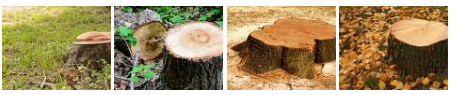

In [23]:
# 우선 영화명, 배우1~ 배우3, 좋아요1~좋아요 3 까지 7개 컬럼으로 DataFrame을 생성한다.  
movie = pd.read_csv('data/movie.csv')
actor = movie[['movie_title',\
               'actor_1_name',\
               'actor_2_name',\
               'actor_3_name',\
               'actor_1_facebook_likes',\
               'actor_2_facebook_likes',\
               'actor_3_facebook_likes']]
actor.head()

,movie_title,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN


## >> How to do it...

In [24]:
# 8.3.1 wide_to_long 을 적용할 수 있도록 컬럼명을 접두부와 일련번호부를 포함하는 형태로 
# 변경할 함수를 만든다. 
#  'actor_1_name'   ==> 'actor_1'
#  'actor_1_facebook_likes'  ==> 'actor_facebook_likes_1'
def change_col_name(col_name):
    col_name = col_name.replace('_name', '')
    if 'facebook' in col_name:  # 가운데 있는 숫자를 뒤로 보낸다.
        fb_idx = col_name.find('facebook')
        col_name = col_name[:5] + col_name[fb_idx - 1:] + col_name[5:fb_idx-1]
    return col_name

In [25]:
# 8.3.2 컬럼명을 재지정하는데, 매개 변수로 사용자 정의 함수를 전달 하였다. 
actor2 = actor.rename(columns=change_col_name)
actor2.head()

,movie_title,actor_1,actor_2,actor_3,actor_facebook_likes_1,actor_facebook_likes_2,actor_facebook_likes_3
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi,1000.0,936.0,855.0
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport,40000.0,5000.0,1000.0
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11000.0,393.0,161.0
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000.0,23000.0,23000.0
4,Star Wars: Episode VII - The Force Awakens,Doug Walker,Rob Walker,NaN,131.0,12.0,NaN


In [26]:
# 8.3.3 stubnames에 접두부 (어근(語根))를 지정하고 
#        i 에 인덱스가 될 컬럼을, 
#        j에 일련번호부로 갖고 있던 수치값의 컬럼명을 ,
#        sep에 구분자를 지정한다. 
stubs = ['actor', 'actor_facebook_likes']
actor2_tidy = pd.wide_to_long(actor2, 
                              stubnames= stubs, 
                              i=['movie_title'], 
                              j='actor_num', 
                              sep='_').reset_index()
actor2_tidy.head()

,movie_title,actor_num,actor,actor_facebook_likes
0,Avatar,1,CCH Pounder,1000.0
1,Pirates of the Caribbean: At World's End,1,Johnny Depp,40000.0
2,Spectre,1,Christoph Waltz,11000.0
3,The Dark Knight Rises,1,Tom Hardy,27000.0
4,Star Wars: Episode VII - The Force Awakens,1,Doug Walker,131.0


## >> There's more... 8.3

In [27]:
# wide_to_long의 사용 예시를 살펴보기 위해 추가적인 사례를 살펴본다. 
# stackme.csv로 부터 load 한 df를 살펴보면
# a1 b1 이 같은 종류의 값이고, d e 가 같은 종류의 값이다. 
# a1 과 d 가 같은 행의 쌍이 되는 데이터이고,  b2와 e 가 하나의 쌍이다. 
df = pd.read_csv('data/stackme.csv')
df

,State,Country,a1,b2,Test,d,e
0,TX,US,0.45,0.3,Test1,2,6
1,MA,US,0.03,1.2,Test2,9,7
2,ON,CAN,0.70,4.2,Test3,4,2


In [28]:
# 이를 표현하기 위해서 컬럼명을 적절하게 수정한다. 
# stub = ['group1', 'group2']
# suffix = ['a1', 'b2']
df2 = df.rename(columns = {'a1':'group1_a1', 'b2':'group1_b2',
                           'd':'group2_a1', 'e':'group2_b2'})
df2

,State,Country,group1_a1,group1_b2,Test,group2_a1,group2_b2
0,TX,US,0.45,0.3,Test1,2,6
1,MA,US,0.03,1.2,Test2,9,7
2,ON,CAN,0.70,4.2,Test3,4,2


In [29]:
# 수정된 컬럼명에 대해서 wide_to_long 을 적용한다. 
# suffix에 숫자 외에 문자열이 올 수 있도록 포맷을 지정한다. 
pd.wide_to_long(df2, 
                stubnames=['group1', 'group2'], 
                i=['State', 'Country', 'Test'], 
                j='Label', 
                suffix='.+', 
                sep='_')

group1  group2
State Country Test  Label                
TX    US      Test1 a1       0.45       2
                    b2       0.30       6
MA    US      Test2 a1       0.03       9
                    b2       1.20       7
ON    CAN     Test3 a1       0.70       4
                    b2       4.20       2

In [85]:
# 수정된 컬럼명에 대해서 wide_to_long 을 적용한다. 
# suffix에 숫자 외에 문자열이 올 수 있도록 포맷을 지정한다. 
pd.wide_to_long(df2, 
                stubnames=['group1', 'group2'], 
                i=['State', 'Country', 'Test'], 
                j='Label', 
                suffix='.+', 
                sep='_').reset_index()

,State,Country,Test,Label,group1,group2
0,TX,US,Test1,a1,0.45,2
1,TX,US,Test1,b2,0.30,6
2,MA,US,Test2,a1,0.03,9
3,MA,US,Test2,b2,1.20,7
4,ON,CAN,Test3,a1,0.70,4
5,ON,CAN,Test3,b2,4.20,2


# 8.4 Inverting stacked data

In [30]:
### [Tech] stack/unstack  vs. melt/pivot
### [Goal] Tidy하게 정리한 데이터를 직관적으로 이해하기 위해 분할표 (crosstab)으로 
##         재구성 할 수 있다. (많은 보고서에 사용된다.)
##         지금까지 학습한 stack()에 대해서는 unstack()
##         melt() 에 대해서는 pivot() 이라는 대응 되는 메소드가 있는데, 
##         stack()/unstack() 이 단순하게 사용하기 좋고
##         melt()/pivot()은 보다 유연하게 활용 할 수 있다. 
### [Data] college.csv

## >> How to do it...

In [31]:
# 8.4.1 학교 명칭과 'UGDS_'로 시작하는 컬럼만 대상으로 하는 college를 생성한다. 
#  usecols 에 callable(=함수)를 전달하면 각 컬럼명을 평가하여 True만 filter 함
college = pd.read_csv('data/college.csv', 
                      index_col='INSTNM', 
                      usecols=lambda x: 'UGDS_' in x or x == 'INSTNM')
college.head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [32]:
# 8.4.2 college를 stack() 메소드을 이용해서 , 수평 컬럼을 수직 인덱스로 변환한다. (stack 한다)
college_stacked = college.stack(dropna = False)
college_stacked.head(18)

INSTNM                                         
Alabama A & M University             UGDS_WHITE    0.0333
                                     UGDS_BLACK    0.9353
                                     UGDS_HISP     0.0055
                                     UGDS_ASIAN    0.0019
                                     UGDS_AIAN     0.0024
                                     UGDS_NHPI     0.0019
                                     UGDS_2MOR     0.0000
                                     UGDS_NRA      0.0059
                                     UGDS_UNKN     0.0138
University of Alabama at Birmingham  UGDS_WHITE    0.5922
                                     UGDS_BLACK    0.2600
                                     UGDS_HISP     0.0283
                                     UGDS_ASIAN    0.0518
                                     UGDS_AIAN     0.0022
                                     UGDS_NHPI     0.0007
                                     UGDS_2MOR     0.0368
                        

In [33]:
# 8.4.3 수직화된 인덱스를 .unstack()메소드를 통해 다시 수평 컬럼으로 되돌린다 (unstack 한다.)
college_stacked.unstack().head()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [34]:
# 처음 원본가 동일하다.
college.equals( college_stacked.unstack())

True

In [35]:
# 8.4.4 8.4.1 에서 구성한 college와 동일하되, 인덱스를 지정하지 않은 college2를 생성한다. 
college2 = pd.read_csv('data/college.csv', 
                      usecols=lambda x: 'UGDS_' in x or x == 'INSTNM')
college2.head()

,INSTNM,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
1,University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
2,Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
3,University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
4,Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137


In [36]:
# 8.4.5 id_var에 'INSTNM', var_name 에 'Race' , value_name 에 'Percentage'를
#       지정해서 melt() 메소드를  호출한다.
#       stack이 Sereis를 생성한 것에 비해, DataFrame 형태로 정리 되었다. 
college_melted = college2.melt(id_vars='INSTNM', var_name='Race', value_name='Percentage')
college_melted.head()

,INSTNM,Race,Percentage
0,Alabama A & M University,UGDS_WHITE,0.0333
1,University of Alabama at Birmingham,UGDS_WHITE,0.5922
2,Amridge University,UGDS_WHITE,0.2990
3,University of Alabama in Huntsville,UGDS_WHITE,0.6988
4,Alabama State University,UGDS_WHITE,0.0158


In [37]:
# 8.4.6 melt 된 DataFrame을 다시 수평화 하기 위해서 pivot() 메소드를 지정한다. 
# id_vars <--> index
# var_name <--> columns
# value_name <--> values

# 참고 : 후술할 pivot_table()과는 다른 메소드이다.ㅏ 
melted_inv = college_melted.pivot(index='INSTNM', columns='Race', values='Percentage')
melted_inv.head()

Race,UGDS_2MOR,UGDS_AIAN,UGDS_ASIAN,UGDS_BLACK,UGDS_HISP,UGDS_NHPI,UGDS_NRA,UGDS_UNKN,UGDS_WHITE
INSTNM,,,,,,,,,
A & W Healthcare Educators,0.0000,0.0,0.0000,0.9750,0.0250,0.0,0.0000,0.0000,0.0000
A T Still University of Health Sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABC Beauty Academy,0.0000,0.0,0.9333,0.0333,0.0333,0.0,0.0000,0.0000,0.0000
ABC Beauty College Inc,0.0000,0.0,0.0000,0.6579,0.0526,0.0,0.0000,0.0000,0.2895
AI Miami International University of Art and Design,0.0018,0.0,0.0018,0.0198,0.4773,0.0,0.0025,0.4644,0.0324


In [38]:
# 8.4.7 인덱스 컬럼순서를 원래 college2와 동일하게 하고, INSTNM 인덱스를 해제하면
#       college2와 동일함을 확인한다. 
college2_replication = melted_inv.loc[college2['INSTNM'], college2.columns[1:]]\
                                         .reset_index()
college2.equals(college2_replication)

True

## >> There's more... 8.4

In [39]:
# Stack 된 상태에서 행 인덱스는 MultiIndex가 된다. 
# 다시 unstack 할 때에는 안쪽 (데이터에 가까운 쪽,  level= -1)을 기본값으로 사용하는데,
# 명시적으로 level을 지정하면 해당 level이 unstack 된다. 
# 결과적으로 전치 (transpose) 한 결과가 된다. 
college.stack().unstack(0)

INSTNM,Alabama A & M University,University of Alabama at Birmingham,Amridge University,University of Alabama in Huntsville,Alabama State University,The University of Alabama,Central Alabama Community College,Athens State University,Auburn University at Montgomery,Auburn University,...,MCI Institute of Technology-Boca Raton,West Coast University-Miami,National American University-Houston,Aparicio-Levy Technical College,Fred D. Learey Technical College,Hollywood Institute of Beauty Careers-West Palm Beach,Hollywood Institute of Beauty Careers-Casselberry,Coachella Valley Beauty College-Beaumont,Dewey University-Mayaguez,Coastal Pines Technical College
UGDS_WHITE,0.0333,0.5922,0.2990,0.6988,0.0158,0.7825,0.7255,0.7823,0.5328,0.8507,...,0.0199,0.1522,0.1858,0.2431,0.3731,0.2182,0.1200,0.3284,0.0,0.6762
UGDS_BLACK,0.9353,0.2600,0.4192,0.1255,0.9208,0.1119,0.2613,0.1200,0.3376,0.0704,...,0.2815,0.1739,0.6443,0.1215,0.1388,0.4182,0.3333,0.1045,0.0,0.2508
UGDS_HISP,0.0055,0.0283,0.0069,0.0382,0.0121,0.0348,0.0044,0.0191,0.0074,0.0248,...,0.6854,0.6087,0.0672,0.6243,0.3080,0.2364,0.4400,0.4925,1.0,0.0359
UGDS_ASIAN,0.0019,0.0518,0.0034,0.0376,0.0019,0.0106,0.0025,0.0053,0.0221,0.0227,...,0.0132,0.0217,0.0079,0.0055,0.0000,0.0182,0.0000,0.0149,0.0,0.0045
UGDS_AIAN,0.0024,0.0022,0.0000,0.0143,0.0010,0.0038,0.0044,0.0157,0.0044,0.0074,...,0.0000,0.0000,0.0079,0.0055,0.0000,0.0000,0.0000,0.0299,0.0,0.0034
UGDS_NHPI,0.0019,0.0007,0.0000,0.0002,0.0006,0.0009,0.0000,0.0010,0.0016,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0149,0.0,0.0017
UGDS_2MOR,0.0000,0.0368,0.0000,0.0172,0.0098,0.0261,0.0000,0.0174,0.0297,0.0000,...,0.0000,0.0435,0.0751,0.0000,0.0022,0.0000,0.0400,0.0149,0.0,0.0191
UGDS_NRA,0.0059,0.0179,0.0000,0.0332,0.0243,0.0268,0.0000,0.0057,0.0397,0.0100,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0182,0.0000,0.0000,0.0,0.0028
UGDS_UNKN,0.0138,0.0100,0.2715,0.0350,0.0137,0.0026,0.0019,0.0334,0.0246,0.0140,...,0.0000,0.0000,0.0119,0.0000,0.1779,0.0909,0.0667,0.0000,0.0,0.0056


In [40]:
college.stack().unstack()

,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
INSTNM,,,,,,,,,
Alabama A & M University,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138
University of Alabama at Birmingham,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100
Amridge University,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715
University of Alabama in Huntsville,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350
Alabama State University,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137
...,...,...,...,...,...,...,...,...,...
Hollywood Institute of Beauty Careers-West Palm Beach,0.2182,0.4182,0.2364,0.0182,0.0000,0.0000,0.0000,0.0182,0.0909
Hollywood Institute of Beauty Careers-Casselberry,0.1200,0.3333,0.4400,0.0000,0.0000,0.0000,0.0400,0.0000,0.0667
Coachella Valley Beauty College-Beaumont,0.3284,0.1045,0.4925,0.0149,0.0299,0.0149,0.0149,0.0000,0.0000


In [41]:
college.transpose()
college.T

INSTNM,Alabama A & M University,University of Alabama at Birmingham,Amridge University,University of Alabama in Huntsville,Alabama State University,The University of Alabama,Central Alabama Community College,Athens State University,Auburn University at Montgomery,Auburn University,...,Strayer University-North Dallas,Strayer University-San Antonio,Strayer University-Stafford,WestMed College - Merced,Vantage College,SAE Institute of Technology San Francisco,Rasmussen College - Overland Park,National Personal Training Institute of Cleveland,Bay Area Medical Academy - San Jose Satellite Location,Excel Learning Center-San Antonio South
UGDS_WHITE,0.0333,0.5922,0.2990,0.6988,0.0158,0.7825,0.7255,0.7823,0.5328,0.8507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_BLACK,0.9353,0.2600,0.4192,0.1255,0.9208,0.1119,0.2613,0.1200,0.3376,0.0704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_HISP,0.0055,0.0283,0.0069,0.0382,0.0121,0.0348,0.0044,0.0191,0.0074,0.0248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_ASIAN,0.0019,0.0518,0.0034,0.0376,0.0019,0.0106,0.0025,0.0053,0.0221,0.0227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_AIAN,0.0024,0.0022,0.0000,0.0143,0.0010,0.0038,0.0044,0.0157,0.0044,0.0074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_NHPI,0.0019,0.0007,0.0000,0.0002,0.0006,0.0009,0.0000,0.0010,0.0016,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_2MOR,0.0000,0.0368,0.0000,0.0172,0.0098,0.0261,0.0000,0.0174,0.0297,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_NRA,0.0059,0.0179,0.0000,0.0332,0.0243,0.0268,0.0000,0.0057,0.0397,0.0100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UGDS_UNKN,0.0138,0.0100,0.2715,0.0350,0.0137,0.0026,0.0019,0.0334,0.0246,0.0140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 8.5 Unstacking after a grouping aggregation

In [42]:
### [Tech] groupby 결과의 unstack
### [Goal] 합산 한 결과의 분할표 : 임직원 인종별 성별 급여평균
###        분할표(crosstab)은 직관적인 이해에 도움이 된다.
###        .groupby를 통해 집계(합산)한 값을 unstack 하여 가독성있게 표현한다. 
### [Data] employee.csv

## >> How to do it...

In [43]:
# 8.5.1 employee를 load 하고, 인종별 기본급의 평균(정수)을  groupby를 이용해서 구한다. 
employee = pd.read_csv('data/employee.csv')
employee.head(3)

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03


In [44]:
employee.groupby('RACE')['BASE_SALARY'].mean().astype(int)

RACE
American Indian or Alaskan Native    60272
Asian/Pacific Islander               61660
Black or African American            50137
Hispanic/Latino                      52345
Others                               51278
White                                64419
Name: BASE_SALARY, dtype: int32

In [45]:
# 8.5.2 인종별 성별로 기본급을 구한고 , agg Series에 저장한다. 
agg = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY'].mean().astype(int)
agg

RACE                               GENDER
American Indian or Alaskan Native  Female    60238
                                   Male      60305
Asian/Pacific Islander             Female    63226
                                   Male      61033
Black or African American          Female    48915
                                   Male      51082
Hispanic/Latino                    Female    46503
                                   Male      54782
Others                             Female    63785
                                   Male      38771
White                              Female    66793
                                   Male      63940
Name: BASE_SALARY, dtype: int32

In [46]:
# 8.5.3 agg의 unstack을 통해 인종 x 성별의 분할표 형태로 기본급을 표현한다. 
agg.unstack('GENDER')

GENDER,Female,Male
RACE,,
American Indian or Alaskan Native,60238,60305
Asian/Pacific Islander,63226,61033
Black or African American,48915,51082
Hispanic/Latino,46503,54782
Others,63785,38771
White,66793,63940


In [47]:
# 8.5.4 반대로 할 수도 있다. RACE의 unstack
agg.unstack('RACE')

RACE,American Indian or Alaskan Native,Asian/Pacific Islander,Black or African American,Hispanic/Latino,Others,White
GENDER,,,,,,
Female,60238,63226,48915,46503,63785,66793
Male,60305,61033,51082,54782,38771,63940


## >> There's more... 8.5

In [48]:
# 인종별 성별 기본급의 평균 외에 최대 최소값을 함께 구하면, 
#  컬럼방향으로  집계값 축이 하나 더 생겼다
agg2 = employee.groupby(['RACE', 'GENDER'])['BASE_SALARY']\
                .agg(['mean', 'max', 'min']).astype(int)
agg2

mean     max    min
RACE                              GENDER                      
American Indian or Alaskan Native Female  60238   98536  26125
                                  Male    60305   81239  26125
Asian/Pacific Islander            Female  63226  130416  26125
                                  Male    61033  163228  27914
Black or African American         Female  48915  150416  24960
                                  Male    51082  275000  26125
Hispanic/Latino                   Female  46503  126115  26125
                                  Male    54782  165216  26104
Others                            Female  63785   63785  63785
                                  Male    38771   38771  38771
White                             Female  66793  178331  27955
                                  Male    63940  210588  26125

In [49]:
# 원하는 형태(직관적으로 이해하기 좋거나 목적에 따라 설명하기 좋은 형태)의 배치가 되도록 
#  unstack을 통해 데이터를 재구성한다.  
# 
agg2.unstack('GENDER')

mean            max            min       
GENDER                            Female   Male  Female    Male Female   Male
RACE                                                                         
American Indian or Alaskan Native  60238  60305   98536   81239  26125  26125
Asian/Pacific Islander             63226  61033  130416  163228  26125  27914
Black or African American          48915  51082  150416  275000  24960  26125
Hispanic/Latino                    46503  54782  126115  165216  26125  26104
Others                             63785  38771   63785   38771  63785  38771
White                              66793  63940  178331  210588  27955  26125

# 8.6 Replicating pivot_table with a groupby aggregation

In [50]:
### [Tech] pivot_table() 
### [Goal] 항공사별(행) 출발공항별(컬럼) 취소된 비행편 건수 집계
###        groupby 후 unstack을 한 번에 수행하는 pivot_table() 메소드가 있다. 
###        엑셀의 pivot과 매우 유사하며, 매개변수에 정확하게 지정하면
###        다양한 형태의 집계표를 손쉽게 작성 할 수 있다. 
### [Data] flight.csv

In [51]:
"""
pd.DataFrame.pivot_table(
    self,
    values=None,   #  집계 대상 컬럼
    index=None,    #  행 인덱스로 그룹화 할 컬럼
    columns=None,  #  컬럼 인덱스로 그룹화 할 컬럼
    aggfunc='mean', # 집계를 수행할 함수 
    fill_value=None, # 누락값 대체 할 값
    margins=False,   # 총합 포함 여부 (전체 집계값)
    dropna=True,     # 모든 값이 NaN 이면 삭제
    margins_name='All', # margins 포함시 컬럼명
    observed=False,    # categorical 컬럼에 대해서 값이 없을 때의 포함여부
)
"""
''

''

## >> How to do it...

In [52]:
# 8.6.1 flights.csv로 부터 flights를 load 한다. 
flights = pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [53]:
# .pivot_table() 메소드를 이용해서 분할표를 작성한다. 
fp = flights.pivot_table(index='AIRLINE',      # 행 인덱스 : 항공사
                         columns='ORG_AIR',    # 컬럼 인덱스 : 출발공항
                         values='CANCELLED',   # 집계 컬럼 : 취소 여부
                         aggfunc='sum',        # 집계 함수 : 합계
                         fill_value=0).round(2) # 누락값은 0으로 채운다
fp.head()

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2
AS,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1
DL,28,1,0,0,1,1,4,0,1,2
EV,18,6,27,36,0,0,6,53,0,0


In [54]:
# 8.6.2  동일한 집계연산을 수행하기 위해서 .groupby() 메소드를 호출한다. 
#   그룹화 컬럼 : 항공사, 출발공항
#   집계컬럼 : 취소여부
#   집계 함수 : 합계
fg = flights.groupby(['AIRLINE', 'ORG_AIR'])['CANCELLED'].sum()
fg.head()

AIRLINE  ORG_AIR
AA       ATL         3
         DEN         4
         DFW        86
         IAH         3
         LAS         3
Name: CANCELLED, dtype: int64

In [55]:
# 8.6.3  .groupby() 결과에 대해서 
#   출발 항공을 unstack하여 수평 컬럼으로 재구성한다. 
fg_unstack = fg.unstack('ORG_AIR', fill_value=0)
fg_unstack.head()

ORG_AIR,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,3,4,86,3,3,11,3,35,4,2
AS,0,0,0,0,0,0,0,0,0,0
B6,0,0,0,0,0,0,0,0,0,1
DL,28,1,0,0,1,1,4,0,1,2
EV,18,6,27,36,0,0,6,53,0,0


In [56]:
# pivot_table로 구한 결과와 groupby+unstack으로 구한 결과가 같다.
fp.equals(fg_unstack)

True

## >> There's more... 8.6

In [57]:
# 보다 복잡한 집계에 대해서 살펴보자.
#  pivot_tables()
#  행 : 항공사별 월별
#  컬럼 :  출발 공항별 취소여부별
#  집계 대상 : 도착 지연 , 운항거리
#  집계 함수 : 평균 및 합계
flights.pivot_table(index=['AIRLINE', 'MONTH'],
                          columns=['ORG_AIR', 'CANCELLED'],
                          values=['DEP_DELAY', 'DIST'],
                          aggfunc=[np.mean, np.sum],
                          fill_value=0)


mean                                                 \
               DEP_DELAY                                                  
ORG_AIR              ATL           DEN           DFW             IAH      
CANCELLED              0  1          0  1          0    1          0  1   
AIRLINE MONTH                                                             
AA      1      -3.250000  0   7.062500  0  11.977591 -3.0   9.750000  0   
        2      -3.000000  0   5.461538  0   8.756579  0.0   1.000000  0   
        3      -0.166667  0   7.666667  0  15.383784  0.0  10.900000  0   
        4       0.071429  0  20.266667  0  10.501493  0.0   6.933333  0   
        5       5.777778  0  23.466667  0  16.798780  0.0   3.055556  0   
...                  ... ..        ... ..        ...  ...        ... ..   
WN      7      21.700000  0  13.143836  0   0.000000  0.0   0.000000  0   
        8      16.207547  0   7.375000  0   0.000000  0.0   0.000000  0   
        9       8.680672  0   4.378882  0   0.000000  0.0   0.000000  0   
        11      5.932203  0   8.215569  0   0.000000  0.0   0.000000  0   
        12     15.691589  0  12.166667  0   0.000000  0.0   0.000000  0   

                             ...     sum                                \
                             ...    DIST                                 
ORG_AIR              LAS     ...     LAX          MSP        ORD         
CANCELLED              0  1  ...       0     1      0  1       0     1   
AIRLINE MONTH                ...                                         
AA      1      32.375000  0  ...  135921  2475   7281  0  129334     0   
        2      -3.055556  0  ...  113483  5454   5040  0  120572  5398   
        3      12.074074  0  ...  131836  1744  14471  0  127072   802   
        4      27.241379  0  ...  170285     0   4541  0  152154  4718   
        5       2.818182  0  ...  167484     0   6298  0  110864  1999   
...                  ... ..  ...     ...   ...    ... ..     ...   ...   
WN      7      22.439024  0  ...   98545  2950  19418  0       0     0   
        8      16.158974  0  ...   82705  1384  13735  0       0     0   
        9       7.179487  0  ...   83021   953  15466  0       0     0   
        11      7.522989  0  ...   74092  1378   8031  0       0     0   
        12     11.994845  0  ...   85228  2134  12060  0       0     0   

                                         
                                         
ORG_AIR           PHX         SFO        
CANCELLED           0    1      0     1  
AIRLINE MONTH                            
AA      1       21018    0  33483     0  
        2       17049  868  32110  2586  
        3       25770    0  43580     0  
        4       17727    0  51054     0  
        5       11164    0  40233     0  
...               ...  ...    ...   ...  
WN      7      124669  369  24176     0  
        8      153350    0  18056   784  
        9      130926    0  27800   709  
        11     117726  872  23235   784  
        12     112871    0  30508     0  

[149 rows x 80 columns]

In [90]:
#  groupby + unstack
#  그룹화 : 항공사별 월별 출발 공항별 취소여부별
#  집계 대상 : 도착 지연 , 운항거리
#  집계 함수 : 평균 및 합계
#  컬럼으로 unstack : 출발 공항별 취소여부별
flights.groupby(['AIRLINE', 'MONTH','ORG_AIR', 'CANCELLED'])\
        [['DEP_DELAY', 'DIST']]\
        .agg(['mean','sum'])\
        .unstack(['ORG_AIR', 'CANCELLED'], fill_value=0)\
        .swaplevel(0,1,axis='columns') # .groupby 는 집계컬럼 별 집계 함수 순으로 배치됨.

mean                                                       \
               DEP_DELAY                                                        
ORG_AIR              ATL             DEN             DFW             IAH        
CANCELLED              0    1          0    1          0    1          0    1   
AIRLINE MONTH                                                                   
AA      1      -3.250000  0.0   7.062500  0.0  11.977591 -3.0   9.750000  0.0   
        2      -3.000000  NaN   5.461538  NaN   8.756579  NaN   1.000000  NaN   
        3      -0.166667  NaN   7.666667  0.0  15.383784  NaN  10.900000  0.0   
        4       0.071429  0.0  20.266667  0.0  10.501493  NaN   6.933333  0.0   
        5       5.777778  0.0  23.466667  NaN  16.798780  NaN   3.055556  NaN   
...                  ...  ...        ...  ...        ...  ...        ...  ...   
WN      7      21.700000  0.0  13.143836  0.0   0.000000  0.0   0.000000  0.0   
        8      16.207547  0.0   7.375000  0.0   0.000000  0.0   0.000000  0.0   
        9       8.680672  0.0   4.378882  0.0   0.000000  0.0   0.000000  0.0   
        11      5.932203  NaN   8.215569  NaN   0.000000  0.0   0.000000  0.0   
        12     15.691589  0.0  12.166667  NaN   0.000000  0.0   0.000000  0.0   

                               ...     sum                                \
                               ...    DIST                                 
ORG_AIR              LAS       ...     LAX          MSP        ORD         
CANCELLED              0    1  ...       0     1      0  1       0     1   
AIRLINE MONTH                  ...                                         
AA      1      32.375000  0.0  ...  135921  2475   7281  0  129334     0   
        2      -3.055556  NaN  ...  113483  5454   5040  0  120572  5398   
        3      12.074074  0.0  ...  131836  1744  14471  0  127072   802   
        4      27.241379  0.0  ...  170285     0   4541  0  152154  4718   
        5       2.818182  0.0  ...  167484     0   6298  0  110864  1999   
...                  ...  ...  ...     ...   ...    ... ..     ...   ...   
WN      7      22.439024  NaN  ...   98545  2950  19418  0       0     0   
        8      16.158974  NaN  ...   82705  1384  13735  0       0     0   
        9       7.179487  0.0  ...   83021   953  15466  0       0     0   
        11      7.522989  NaN  ...   74092  1378   8031  0       0     0   
        12     11.994845  NaN  ...   85228  2134  12060  0       0     0   

                                         
                                         
ORG_AIR           PHX         SFO        
CANCELLED           0    1      0     1  
AIRLINE MONTH                            
AA      1       21018    0  33483     0  
        2       17049  868  32110  2586  
        3       25770    0  43580     0  
        4       17727    0  51054     0  
        5       11164    0  40233     0  
...               ...  ...    ...   ...  
WN      7      124669  369  24176     0  
        8      153350    0  18056   784  
        9      130926    0  27800   709  
        11     117726  872  23235   784  
        12     112871    0  30508     0  

[149 rows x 80 columns]

# 8.7 Renaming axis levels for easy reshaping

In [59]:
### [Tech] renaming, leveling, reshaping (.rename_axis(), .swap_level())
### [Goal] 대학생, 주별 종교별, 인종 구성 및 SAT 점수 (개수, 최소, 최대)
###  집계 후 형성되는 MultiIndex 에서 데이터의 재구성을 위해서는 
###  레벨별로 이름이 지정되면 stack/unstack에서 활용하기 용이하다.
###   각 레벨에 이름을 부여한다. 
### [Data] college.csv

## >> How to do it...

In [91]:
# 8.7.1 college.csv로 부터 college를 load 하고 
#  state별 종교기반 별,   학부생수와 SAT 수학점수의 개수, 최소, 최대 값을 구한다. 
#  편의상 6 개 line .head(6)을 수행하고, cg (= college_grouped)에 저장한다. 
college = pd.read_csv('data/college.csv')
cg = college.groupby(['STABBR', 'RELAFFIL'])\
            [['UGDS', 'SATMTMID']] \
            .agg(['count', 'min', 'max']).head(6)
cg

UGDS                 SATMTMID              
                count    min      max    count    min    max
STABBR RELAFFIL                                             
AK     0            7  109.0  12865.0        0    NaN    NaN
       1            3   27.0    275.0        1  503.0  503.0
AL     0           71   12.0  29851.0       13  420.0  590.0
       1           18   13.0   3033.0        8  400.0  560.0
AR     0           68   18.0  21405.0        9  427.0  565.0
       1           14   20.0   4485.0        7  495.0  600.0

In [93]:
# 8.7.2  컬럼 인덱스 (축 axis)에 대해서 이름을 부여한다. 
#  밖(0)에서 안쪽(-1)으로 부여 된다. 
cg = cg.rename_axis(['AGG_COLS', 'AGG_FUNCS'], axis='columns')
cg

AGG_COLS         UGDS                 SATMTMID              
AGG_FUNCS       count    min      max    count    min    max
STABBR RELAFFIL                                             
AK     0            7  109.0  12865.0        0    NaN    NaN
       1            3   27.0    275.0        1  503.0  503.0
AL     0           71   12.0  29851.0       13  420.0  590.0
       1           18   13.0   3033.0        8  400.0  560.0
AR     0           68   18.0  21405.0        9  427.0  565.0
       1           14   20.0   4485.0        7  495.0  600.0

In [94]:
# 8.7.3  집계 함수에 대해서 stack을 수행한다. 명시적으로 레벨명'AGG_FUNCS'을 인자로 전달한다. 
cg.stack('AGG_FUNCS')

AGG_COLS                      UGDS  SATMTMID
STABBR RELAFFIL AGG_FUNCS                   
AK     0        count          7.0       0.0
                min          109.0       NaN
                max        12865.0       NaN
       1        count          3.0       1.0
                min           27.0     503.0
                max          275.0     503.0
AL     0        count         71.0      13.0
                min           12.0     420.0
                max        29851.0     590.0
       1        count         18.0       8.0
                min           13.0     400.0
                max         3033.0     560.0
AR     0        count         68.0       9.0
                min           18.0     427.0
                max        21405.0     565.0
       1        count         14.0       7.0
                min           20.0     495.0
                max         4485.0     600.0

In [63]:
# 8.7.4 swaplevel을 이용해서 행인덱스의 순서를 정리한다. 
#   swaplevel은 한 번에 한 쌍의 위치 변경만 가능하다.
#   집계 함수인덱스를 (AGG_FUNCS)를 가장 바깥쪽에 'STABBR' 인덱스와 위치 변경한다. 
cg.stack('AGG_FUNCS').swaplevel('AGG_FUNCS', 'STABBR', axis='index').head()

,,AGG_COLS,UGDS,SATMTMID
AGG_FUNCS,RELAFFIL,STABBR,,
count,0,AK,7.0,0.0
min,0,AK,109.0,NaN
max,0,AK,12865.0,NaN
count,1,AK,3.0,1.0
min,1,AK,27.0,503.0


In [64]:
# 8.7.5 이어서, 행 인덱스는 RELAFFIL 기준으로,  컬럼인덱스는 AGG_COLS 기준으로 sort 정렬한다. 
cg.stack('AGG_FUNCS') \
  .swaplevel('AGG_FUNCS', 'STABBR', axis='index') \
  .sort_index(level='RELAFFIL', axis='index') \
  .sort_index(level='AGG_COLS', axis='columns').head()

AGG_COLS                   SATMTMID     UGDS
AGG_FUNCS RELAFFIL STABBR                   
count     0        AK           0.0      7.0
                   AL          13.0     71.0
                   AR           9.0     68.0
max       0        AK           NaN  12865.0
                   AL         590.0  29851.0

In [95]:
cg.head(10)

AGG_COLS         UGDS                 SATMTMID              
AGG_FUNCS       count    min      max    count    min    max
STABBR RELAFFIL                                             
AK     0            7  109.0  12865.0        0    NaN    NaN
       1            3   27.0    275.0        1  503.0  503.0
AL     0           71   12.0  29851.0       13  420.0  590.0
       1           18   13.0   3033.0        8  400.0  560.0
AR     0           68   18.0  21405.0        9  427.0  565.0
       1           14   20.0   4485.0        7  495.0  600.0

In [65]:
# 8.7.6 집계 결과를 행으로 정리하고 집계 기준을 전부 컬럼으로 올린 형태이다.
#  레벨명을 이용해서 명시적으로 지정하기 편하다. 
cg.stack('AGG_FUNCS').unstack(['RELAFFIL', 'STABBR'])

AGG_COLS      UGDS                                          SATMTMID         \
RELAFFIL         0      1        0       1        0       1        0      1   
STABBR          AK     AK       AL      AL       AR      AR       AK     AK   
AGG_FUNCS                                                                     
count          7.0    3.0     71.0    18.0     68.0    14.0      0.0    1.0   
min          109.0   27.0     12.0    13.0     18.0    20.0      NaN  503.0   
max        12865.0  275.0  29851.0  3033.0  21405.0  4485.0      NaN  503.0   

AGG_COLS                               
RELAFFIL       0      1      0      1  
STABBR        AL     AL     AR     AR  
AGG_FUNCS                              
count       13.0    8.0    9.0    7.0  
min        420.0  400.0  427.0  495.0  
max        590.0  560.0  565.0  600.0

In [66]:
# 8.7.7 모든 값을 행인덱스로 보내고 (stack하고 ) Series로 정리한 형태이다. 
cg.stack(['AGG_FUNCS', 'AGG_COLS']).head(12)

STABBR  RELAFFIL  AGG_FUNCS  AGG_COLS
AK      0         count      UGDS            7.0
                             SATMTMID        0.0
                  min        UGDS          109.0
                  max        UGDS        12865.0
        1         count      UGDS            3.0
                             SATMTMID        1.0
                  min        UGDS           27.0
                             SATMTMID      503.0
                  max        UGDS          275.0
                             SATMTMID      503.0
AL      0         count      UGDS           71.0
                             SATMTMID       13.0
dtype: float64

## >> There's more... 8.7

In [67]:
# 모든 레벨명을 제거 하려면, rename_axis를 통해 None 값을 전달하면 된다. 
cg.rename_axis([None, None], axis='index').rename_axis([None, None], axis='columns')

UGDS                 SATMTMID              
     count    min      max    count    min    max
AK 0     7  109.0  12865.0        0    NaN    NaN
   1     3   27.0    275.0        1  503.0  503.0
AL 0    71   12.0  29851.0       13  420.0  590.0
   1    18   13.0   3033.0        8  400.0  560.0
AR 0    68   18.0  21405.0        9  427.0  565.0
   1    14   20.0   4485.0        7  495.0  600.0

# 8.8 Tidying when multiple variables are stored as column names

In [68]:
### [Tech] melt(), string split using .str.split()
### [Goal] weight lift 표를 tidy 하게 정리
###       컬럼이 단순히 하나의 변수값이 수평으로 나열 된 것에 더해서 
###       복합되어 나타나는 경우가 있다. 예) 성별과 연령대의 조합
###        melt를 이용해서 수직화 한 다음, 
###       .str 액세서accessor를 이용해서 복합 된 값을 분리한다
### [Data] weightlifting_men.csv

## >> How to do it...

In [69]:
# 8.8.1 weightlifting 데이터 셋을 읽어서 weightlifting에 load 한다. 
#     무게 값을 갖는 성별/연령대별 정보가 컬럼명 형태로 수평으로 펼쳐져 있다.  
weightlifting = pd.read_csv('data/weightlifting_men.csv')
weightlifting

,Weight Category,M35 35-39,M40 40-44,M45 45-49,M50 50-54,M55 55-59,M60 60-64,M65 65-69,M70 70-74,M75 75-79,M80 80+
0,56,137,130,125,115,102,92,80,67,62,55
1,62,152,145,137,127,112,102,90,75,67,57
2,69,167,160,150,140,125,112,97,82,75,60
3,77,182,172,165,150,135,122,107,90,82,65
4,85,192,182,175,160,142,130,112,95,87,70
5,94,202,192,182,167,150,137,120,100,90,75
6,105,210,200,190,175,157,142,122,102,95,80
7,105+,217,207,197,182,165,150,127,107,100,85


In [70]:
# 8.8.2 melt 함수를 이용해서 수직으로 정리하고 wl_melt에 저장한다. 
wl_melt = weightlifting.melt(id_vars='Weight Category',  # 기준값 :  체급
                             var_name='sex_age',         #  변수화 한 컬럼들의  컬럼명
                             value_name='Qual Total')    # 값이 될 컬럼의 컬럼명
wl_melt.head()

,Weight Category,sex_age,Qual Total
0,56,M35 35-39,137
1,62,M35 35-39,152
2,69,M35 35-39,167
3,77,M35 35-39,182
4,85,M35 35-39,192


In [71]:
# 8.8.3 wl_melt의 'sex_age' 컬럼의 값을 공백을 기준으로 나눈다. 
#  expand = True를 통해 2개 의 컬럼으로 분리하여 sex_age DataFrame으로 저장한다. 
sex_age = wl_melt['sex_age'].str.split(expand =  True)
sex_age.head()

,0,1
0,M35,35-39
1,M35,35-39
2,M35,35-39
3,M35,35-39
4,M35,35-39


In [72]:
# 8.8.4 컬럼명을 지정한다. 
sex_age.columns = ['Sex', 'Age Group']
sex_age.head()

,Sex,Age Group
0,M35,35-39
1,M35,35-39
2,M35,35-39
3,M35,35-39
4,M35,35-39


In [73]:
# 8.8.5 성별 컬럼에서 연령대 정보는 불필요하므로 이를 제거하여 재저장한다. 
sex_age['Sex'] = sex_age['Sex'].str[0]
sex_age.head()

,Sex,Age Group
0,M,35-39
1,M,35-39
2,M,35-39
3,M,35-39
4,M,35-39


In [74]:
# 8.8.6 sex_age DataFrame과 
#       wl_melt에서 'Weight Category',  'Qual Total'을 발췌한 DataFrame을
#       pd.concat을 이용해 연결한다. (pd.concat : 지정된 축 방향으로 단순 연결)
wl_cat_total = wl_melt[['Weight Category', 'Qual Total']]
wl_tidy = pd.concat([sex_age, wl_cat_total], axis='columns')
wl_tidy.head()

,Sex,Age Group,Weight Category,Qual Total
0,M,35-39,56,137
1,M,35-39,62,152
2,M,35-39,69,167
3,M,35-39,77,182
4,M,35-39,85,192


In [75]:
# 8.8.7 concat 대신에 sex_age DataFrame에 wl_melt의 지정된 컬럼을 생성하는 방법도 있다. 
cols = ['Weight Category', 'Qual Total']
sex_age[cols] = wl_melt[cols]
sex_age.head()

,Sex,Age Group,Weight Category,Qual Total
0,M,35-39,56,137
1,M,35-39,62,152
2,M,35-39,69,167
3,M,35-39,77,182
4,M,35-39,85,192


## >> There's more... 8.8

In [76]:
# 다른 접근 방법 >>>
# age_group, sex를 각각 직접 Series로 구성
age_group = wl_melt.sex_age\
            .str.extract('(\d{2}[-+](?:\d{2})?)', expand=False)
sex = wl_melt.sex_age.str[0]

# 컬럼명을 key, Series를 값으로 하는 사전 dictionary new_cols로 재구성
new_cols = {'Sex':sex, 
            'Age Group':age_group}

# wl_melt DataFrame에 assign 메소드로 컬럼을 추가 (new_cols를 unpacking) 후
# 기존의 sex_age 컬럼을 삭제하고 wl_tidy2에 저장
wl_tidy2 = wl_melt.assign(**new_cols)\
            .drop('sex_age', axis='columns')

# wl_tidy2  와 wl_tidy를 컬럼 인덱스를 정렬하여 같은지 비교한다. 
wl_tidy2.sort_index(axis=1).equals(wl_tidy.sort_index(axis=1))

True

In [77]:
wl_tidy.head()

,Sex,Age Group,Weight Category,Qual Total
0,M,35-39,56,137
1,M,35-39,62,152
2,M,35-39,69,167
3,M,35-39,77,182
4,M,35-39,85,192


In [78]:
wl_tidy2.head()

,Weight Category,Qual Total,Sex,Age Group
0,56,137,M,35-39
1,62,152,M,35-39
2,69,167,M,35-39
3,77,182,M,35-39
4,85,192,M,35-39


In [79]:
age_group.head(3)

0    35-39
1    35-39
2    35-39
Name: sex_age, dtype: object

In [80]:
sex.head(3)

0    M
1    M
2    M
Name: sex_age, dtype: object

In [81]:
new_cols

{'Sex': 0     M
 1     M
 2     M
 3     M
 4     M
      ..
 75    M
 76    M
 77    M
 78    M
 79    M
 Name: sex_age, Length: 80, dtype: object,
 'Age Group': 0     35-39
 1     35-39
 2     35-39
 3     35-39
 4     35-39
       ...  
 75      80+
 76      80+
 77      80+
 78      80+
 79      80+
 Name: sex_age, Length: 80, dtype: object}

# 8.9 Tidying when multiple variables are stored as column values

In [82]:
### [Tech] .squeeze
### [Goal] 피자집 정보 정리
###      각각이 컬럼을 구성해야 하는 항목이 키컬럼 : 값컬럼의 구조로 각각 컬럼을 구성하는 형태로
###     데이터가 주어진 경우에 대해서 정리해 보자.  
### [Data] restraunt_inspections.csv

## >> How to do it...

In [83]:
# 8.9.1 restrant_inspections.csv를 instpection으로 load 한다. Date는 날자형으로 한다.
# 데이터를 살펴보면, Info와 Value가 key: 값 의 구조로 되어 있으며, 
# Bourogh, Cusine, Description , Grade, Score는 각각의 컬럼으로 구성되는 것이 적절하다.
inspections = pd.read_csv('data/restaurant_inspections.csv', parse_dates=['Date'])
inspections.head(10)

,Name,Date,Info,Value
0,E & E Grill House,2017-08-08,Borough,MANHATTAN
1,E & E Grill House,2017-08-08,Cuisine,American
2,E & E Grill House,2017-08-08,Description,Non-food contact surface improperly constructe...
3,E & E Grill House,2017-08-08,Grade,A
4,E & E Grill House,2017-08-08,Score,9.0
5,PIZZA WAGON,2017-04-12,Borough,BROOKLYN
6,PIZZA WAGON,2017-04-12,Cuisine,Pizza
7,PIZZA WAGON,2017-04-12,Description,"Food contact surface not properly washed, rins..."
8,PIZZA WAGON,2017-04-12,Grade,A
9,PIZZA WAGON,2017-04-12,Score,10.0


In [84]:
# 8.9.2 index = ['Name','Date'], column ='Info' , values = 'Value' 로 재구성 되었으면
#  좋겠는데, pivot이  중복된 값이나 MultiIndex를 지원 하지 않는다. 
inspections.pivot(index=['Name', 'Date'], columns='Info', values='Value')

NotImplementedError: > 1 ndim Categorical are not supported at this time

In [ ]:
# 8.9.3 unstack, stack으로 모양을 잡아본다. 
# Name, Date, Info를 인덱스로 설정한다. 
inspections.set_index(['Name','Date', 'Info']).head(10)

In [ ]:
# 8.9.4 Info를 unstack한다. 
inspections.set_index(['Name','Date', 'Info']).unstack('Info').head()

In [ ]:
# 8.9.5 인덱스를 해제 한다. 인덱스에서 변경된 컬럼명은  가장 안쪽 레벨 (-1)에 맞추어 남긴다. 
insp_tidy = inspections.set_index(['Name','Date', 'Info']) \
                               .unstack('Info') \
                               .reset_index(col_level=-1)
insp_tidy.head()

In [ ]:
# 행인덱스는 reset 되어 RangeIndex 이다. 
insp_tidy.index

In [ ]:
# 컬럼인덱스는 계층적 인덱스이며, 레벨1은 Info 라는 이름을 갖는다. 
insp_tidy.columns

In [ ]:
# 8.9.6  컬럼의 MultiIndex를 정리한다. 가장 바깥쪽 레벨을 제거한다. 
insp_tidy.columns = insp_tidy.columns.droplevel(0).rename(None)
insp_tidy.head()

In [ ]:
# 컬럼인덱스도 별도 레벨 이름 없이 정리 되었다. 
insp_tidy.columns

In [ ]:
# 8.9.7 .squeeze는 단일 컬럼 DataFrame을 Series로 변환하는 메소드이다. 
#  8.9.3 의 결과 생성된 단일 컬럼 DataFrame에 .squeeze를 적용하면 
#     MultiIndex 생성을 피할 수 있다. 
#     .reset_index에서 col_level 매개변수 지정 및 droplevel() 절차를 생략 할 수 있다. 

inspections.set_index(['Name','Date', 'Info']) \
          .squeeze() \
          .unstack('Info') \
          .reset_index() \
          .rename_axis(None, axis='columns')

## >> There's more... 8.9

In [ ]:
# pivot_table 을 통해서 구현 할 수도 있다. 
# pivot_table 은 index와 column이 교차하는 지점의 복수개의 값에 대해 집계를 수행한다.
# 본 예제에서는 단 한 개의 값이 교차 지점에 생성되는데, 이 값을 가지고 오기 위해서 
# 집계함수 aggfunc에 'first'를 지정하면 된다. 

inspections.pivot_table(index=['Name', 'Date'], 
                        columns='Info', 
                        values='Value', 
                        aggfunc='first') \
           .reset_index()\
           .rename_axis(None, axis='columns')

# 8.10 Tidying when two or more values are stored in the same cell

In [ ]:
### [Tech] .str.extract(), pd.concat()
### [Goal] 도시별 위치 정보의 정리 (위치정보가 복합 형태) 위도 (방향/수치), 경도(방향/수치)
###     하나의 컬럼 (결과적으로 각 cell)에 복수의 데이터가 담기는 경우에 대해서 
###     데이터 정렬을 수행한다. 
### [Data] texas_cities.csv

## >> How to do it...

In [ ]:
# 8.10.1 texas_cities.csv로 부터 cities를 load 한다. 
#  Geolocation 컬럼에 위도 경도 정보가 담겨 있는데,
#  이를 각각 위도, 위도 방향, 경도, 경도방향으로 정리한다. 
cities = pd.read_csv('data/texas_cities.csv')
cities

In [ ]:
pd.Series.str.split?

In [ ]:
# 8.10.2 cities.Geolocation을 str.split을 이용해서 4개 컬럼으로 분할 하고 
# 각 컬럼의 이름을 부여한다. 
# .str.split( pat = '. ') 에서 pat은 구분 패턴 지정을 위한 매개변수이고 
# '. '은 글자 하나와 공백이다.  본 예제에서는 '° ' 또는 ', '가 된다. 

geolocations = cities.Geolocation.str.split(pat = '. ', expand=True)
geolocations.columns = ['latitude', 'latitude direction', 'longitude', 'longitude direction']
geolocations

In [ ]:
# 8.10.3 수치 데이터의 형변환을 수행한다. 
geolocations = geolocations.astype({'latitude':'float', 'longitude':'float'})
geolocations.dtypes

In [ ]:
# 8.10.4 도시명 정보와 pd.concat으로 연결한다. 
cities_tidy = pd.concat([cities['City'], geolocations], axis='columns')
cities_tidy

## >> How it works...

In [ ]:
# 데이터 형변환 하는 다른 방법으로 .apply(pd.to_numeric)이 있다. 
# 매개변수 errors = 'ignore'를 적용하여 비수치형 데이터는 무시하도록 할 수 있다. 
temp = geolocations.apply(pd.to_numeric, errors='ignore')
temp

In [ ]:
temp.describe() , temp.info()

In [ ]:
temp.dtypes

## >> There's more... 8.10

In [ ]:
# 구분 패턴을  정규식 대신에 명시적으로 표기 할 수 있다. 
cities.Geolocation.str.split(pat='° |, ', expand=True)

In [ ]:
# split으로 분리하는 대신, 원하는 패턴으로 추출 extract 할 수 도 있다. 
cities.Geolocation.str.extract('([0-9.]+). (N|S), ([0-9.]+). (E|W)', expand=True)

# 8.11 Tidying when variables are stored in column names and values

In [ ]:
### [Tech] 복합된 보고서 형태의 해체 , melt, pivot_tables를 사용한다. 
### [Goal] 연도별 기후 조사 (복합적인 분할표의 정리)
###       변수값이 컬럼으로 펼쳐지고, 각 변수로 정리되어야 할 값이 
###       행에 키 컬럼 : 값 컬럼의 쌍의 형태로 된 데이터를 정리해본다. 
###       누군가 이미 보고서 용으로 정리한 형태의 데이터를 재가공 할 때
###       이런 일이 발생 한다. 
### [Data] sensor.csv

## >> How to do it...

In [ ]:
# 8.11.1 sensors.csv로 부터 sensors를 생성한다. 
#   2012~2016은 연도 컬럼의 변수 값이여야 하고
#   Property 내의 Pressure, Temperature, Flow는 각각 컬럼으로 구성 되어 야 한다. 

sensors = pd.read_csv('data/sensors.csv')
sensors

In [ ]:
# 8.11.2 연도에 해당하는 2012~2016을 수직으로 melt (stack) 한다.
#  남겨야 할 id_vars는 Group과 Property 이고, 수직화 된 컬럼에는 'Year' 라는 이름을 부여한다. 
sensors.melt(id_vars=['Group', 'Property'], var_name='Year').head(6)

In [ ]:
# 8.11.3 pivot_tables를 이용해서 Property 컬럼의 각 값을 
#       수평으로 전개하여 컬럼명으로 재구성한다.  
#       pivot_table의 집계 함수 aggfunc는 기본값으로 mean을 수행하는데, 
#       이 경우는 모두 수치 형이므로 그대로 작동하도록 두면 된다. 
sensors.melt(id_vars=['Group', 'Property'], var_name='Year') \
       .pivot_table(index=['Group', 'Year'], columns='Property', values='value') \
       .reset_index() \
       .rename_axis(None, axis='columns')

## >> There's more... 8.11

In [ ]:

sensors.set_index(['Group', 'Property']) \  # 'Group','Property'의 인덱스 지정
       .stack() \     # 2012~ 2016 을 stack
       .unstack('Property') \ # Property를 unstack 하여 Flow, Pressure, Temperature 생성
       .rename_axis(['Group', 'Year'], axis='index') \ # 행인덱스 축의 이름 지정
       .rename_axis(None, axis='columns') \ # 컬럼인덱스 축의 이름 제거
       .reset_index()  # 인덱스 해제

# 8.12 Tidying when multiple observational units are stored in the same table

In [ ]:
### [Tech] 메모리 사용량을 감안한 중복 데이터의 제거
### [Goal] 영화속, 감독/배우 관련 부가 정보를 각각의 테이블로 분리
###   데이터가 정규화 되어 있으면 관리가 수월하다. (OLTP 성격의 테이블)
###   데이터가 하나의 테이블에 있으면 직관을 얻기 쉬워진다.  (OLAP 성격의 테이블)
###   분석시 목적에 따라서 하나의 테이블에 중복되는 값을 통합 할 수 있으나
###   추가 분석을 위해 데이터를 정리하기 위해서 관측 단위가 다른 테이블은 
###   분리 관리해야 한다. 
###   본 예제에서는 영화와 배우, 감독의 좋아요는 서로 다른 관측 단위를 갖고 있으며 
###   이를 분리해 본다. 
### [Data] movie_altered.csv

## >> How to do it...

In [ ]:
# 8.12.1 movie_altered.csv에서 movie를 load 한다. 
#  (영화의 상세 정보가 몇 가지 생략 되고, 컬럼명이 wide_to_long을 적용하기 좋게 되어 있다.)
#  감독은 감독1 만 있고, actor 2, 3의 경우 누락값일 수도 있다.
movie = pd.read_csv('data/movie_altered.csv')
movie.head()

In [ ]:
# 8.12.2 가공 도중 추적을 위해서 id라는 일련번호의 컬럼을 추가 한다. 
movie.insert(0, 'id', np.arange(len(movie)))
movie.head()

In [ ]:
# 8.12.3 wide_to_long 함수를 이용해서 감독, 감동 fb 좋아요, 배우, 배우 fb 좋아요를 stub로 해서 
# 적재한다. 
stubnames = ['director', 'director_fb_likes', 'actor', 'actor_fb_likes']
movie_long = pd.wide_to_long(movie, 
                                 stubnames=stubnames, 
                                 i='id',     # 남겨 둘 행
                                 j='num',    # suffix가 담길 컬럼의 이름
                                 sep='_').reset_index()    #컬럼명의 구분자

movie_long['num'] = movie_long['num'].astype(int)
                             
movie_long.head(9)

In [ ]:
# 8.12.4 영화, 감독, 배우를 각각의 테이블로 분리하기 위해서  각각 컬럼을 분리하되
#  향후 연결을 위해서 id (영화 id)를 포함한다. 
movie_table = movie_long[['id','title', 'year', 'duration', 'rating']]
director_table = movie_long[['id', 'director', 'num', 'director_fb_likes']]
actor_table = movie_long[['id', 'actor', 'num', 'actor_fb_likes']]

In [ ]:
# 영화는 최대 3개씩 중복되는데 중복 제거가 필요하다. 
movie_table.head(9)

In [ ]:
# 감독은 num 이 2, 3 이 비어 있다. 불필요한 행을 제거해야한다. 
director_table.head(9)

In [ ]:
# 배우의 경우 같은 배우가 다른 영화에 출연해서 중복 되어 있을 수 있으니 확인이 필요하다. 
#  배우도 actor2, actor3가 누락값일 수 있다. 
actor_table.head(9)

In [ ]:
# 8.12.5 중복 제거 및 누락값으로 구성된 행을 삭제하고 다시 인덱스를 재정렬한다. 
#  drop=True 는 기존 인덱스의 제거
movie_table = movie_table.drop_duplicates().reset_index(drop=True)
director_table = director_table.dropna().reset_index(drop=True)
actor_table = actor_table.dropna().reset_index(drop=True)

In [ ]:
movie_table.head()

In [ ]:
director_table.head()

In [ ]:
# 각 테이블의 길이를 비교해본다. 
#  감독정보가 없는 경우도 있다. 
#  배우도 정확하게 영화의 3배는 아니다 , 4916*3 = 14748
len(movie_table), len(director_table),len(actor_table)

In [ ]:
# 8.12.6 이 상태에서 최초 movie와 메모리 사용량을 비교해 본다. 
movie.memory_usage(deep=True).sum()

In [ ]:
# 3개 테이블의 합계가 더 크다.  (id , num 컬럼이 중첩 되어 있다.)
movie_table.memory_usage(deep=True).sum() + \
director_table.memory_usage(deep=True).sum() + \
actor_table.memory_usage(deep=True).sum()

In [ ]:
# 8.12.7  메모리 관리를 효율적으로 하기 위해서 (데이터의 관리도 마찬가지)
#       감독과 배우의 중복을 제거하고, 감독-영화 , 배우-영화의 매핑 정보를 별도로 관리한다. 

#      우선 감독과 배우를 식별하기 위해 각각 director_id, actor_id를 
#      Categorical 변수로 생성하여 각 테이블에 추가한다. 

director_cat = pd.Categorical(director_table['director'])  # 감독 category 변수 생성
director_table.insert(1, 'director_id', director_cat.codes) # director_table 1번 위치에 
                                                    # director_id 라는 컬럼명으로
                                                    # 감독 category 변수의 코드를 저장한다

actor_cat = pd.Categorical(actor_table['actor'] )   # 배우 category 변수 생성
actor_table.insert(1, 'actor_id', actor_cat.codes)  # actor_table 1번 위치에 
                                                    # actor_id 라는 컬럼명으로
                                                    # 배우 category 변수의 코드를 저장한다

director_table.head()

In [ ]:
# 2397 개의 카테고리 변수로 변환 
director_cat

In [ ]:
# .codes에는 정수형으로 각 값을 표현한다. 
director_cat.codes

In [ ]:
# 길이 비교
len(director_cat), len(director_cat.unique())

In [ ]:
# actor_table에도 actor_id가 추가 되었다.
actor_table.head()

In [ ]:
# 8.12.8 영화 - 감독 매핑 테이블을 생성한다. 

# 영화-감독-순번으로 된 매핑 테이블 
director_associative = director_table[['id', 'director_id', 'num']] 

# 감독 테이블에 남길 컬럼만 선택하고, 중복을 제거 후, 인덱스 재정렬을 한다. 
dcols = ['director_id', 'director', 'director_fb_likes'] 
director_unique = director_table[dcols].drop_duplicates().reset_index(drop=True)

# 감독-영화 매핑 테이블
print (len(director_associative))
director_associative.head()                     

In [ ]:
# 감독 fb 좋아요
print (len(director_unique))
director_unique.head()

In [ ]:
# 8.12.9 배우에 대해서도 동일한 작업을 수행한다. 

# 영화-배우-순번으로 된 매핑 테이블 
actor_associative = actor_table[['id', 'actor_id', 'num']]

# 배우 테이블에 남길 컬럼만 선택하고, 중복을 제거 후, 인덱스 재정렬을 한다.
acols = ['actor_id', 'actor', 'actor_fb_likes']
actor_unique = actor_table[acols].drop_duplicates().reset_index(drop=True)

# 영화-배우 매핑 테이블
print (len(actor_associative))
actor_associative.head()

In [ ]:
# 배우 fb 좋아요
print (len(actor_unique))
actor_unique.head()

In [ ]:
# 8.12.10 5개로 분리된 테이블의 메모리 합산
# movie 2296829 보다 불필요한 중복이 제거 된 만큼 메모리 사용량이 줄어 들었다. 
movie_table.memory_usage(deep=True).sum() + \
director_associative.memory_usage(deep=True).sum() + \
director_unique.memory_usage(deep=True).sum() + \
actor_associative.memory_usage(deep=True).sum() + \
actor_unique.memory_usage(deep=True).sum()

## >> There's more... 8.12

In [ ]:
# 분리 된 5개의 테이블을 이용해서 원래의 movie 테이블을 구성 할 수 있다. 


# 1. 영화-배우 매핑 테이블에 배우fb좋아요 정보 merge 후, 컬럼명 정리
actors = actor_associative.merge(actor_unique, on='actor_id') \
                          .drop('actor_id', 1) \
                          .pivot_table(index='id', columns='num', aggfunc='first')

actors.columns = actors.columns.get_level_values(0) + '_' + \
                 actors.columns.get_level_values(1).astype(str)

# 2. 영화-감독 매핑테이블에 감독fb좋아요 정보 merge 후 , 컬럼명 정리
directors = director_associative.merge(director_unique, on='director_id') \
                          .drop('director_id', 1) \
                          .pivot_table(index='id', columns='num', aggfunc='first')

directors.columns = directors.columns.get_level_values(0) + '_' + \
                    directors.columns.get_level_values(1).astype(str)

In [ ]:
actors.head()

In [ ]:
directors.head()

In [ ]:
# 3. movie_table에 directors, actors를 merge
movie2 = movie_table.merge(directors.reset_index(), on='id', how='left') \
                    .merge(actors.reset_index(), on='id', how='left')


In [ ]:
movie2.head()

In [ ]:
#  movie와 movie2를 비교한다. 
movie2.id = movie2.id.astype(np.int32)  # 데이터 형 조정
movie2= movie2[movie.columns] # 데이터 컬럼순서 조정
movie.equals(movie2)